In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [96]:
models = pd.read_csv('output_files/results.csv')

In [97]:
models['model_type'].unique()

array(['RF', 'DT', 'LR', 'NB', 'KNN', 'BG', 'AB', 'GB', 'SVM'],
      dtype=object)

In [98]:
models_to_run = ['RF', 'DT', 'LR', 'NB', 'KNN', 'BG', 'AB', 'GB', 'SVM']
data = pd.DataFrame()
for model in models_to_run:
    param = models[(models['model_type'] == model) & (models['threshold'] == 10)].sort_values(by='precision', ascending=False).iloc[0]['parameters']
    new_df = models[(models['model_type'] == model) & (models['parameters'] == param) & (models['threshold'] == 10)]
    data = pd.concat([data, new_df])

In [99]:
data

,time_period,model_type,clf,parameters,threshold,auc-roc,precision,recall,f1_score
584,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",10.0,0.797211,0.477204,0.237339,0.317012
3090,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",10.0,0.825774,0.553191,0.278287,0.370295
5596,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",10.0,0.890406,0.674772,0.354067,0.464435
1305,train_test_data_period_0,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'gini', ...",10.0,0.649229,0.306991,0.152683,0.203937
3811,train_test_data_period_1,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'gini', ...",10.0,0.693080,0.430091,0.216361,0.287894
6317,train_test_data_period_2,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'gini', ...",10.0,0.792873,0.518237,0.271930,0.356695
1571,train_test_data_period_0,LR,"LogisticRegression(C=10, class_weight=None, du...","{'penalty': 'l1', 'C': 10}",10.0,0.762360,0.501520,0.249433,0.333165
4077,train_test_data_period_1,LR,"LogisticRegression(C=10, class_weight=None, du...","{'penalty': 'l1', 'C': 10}",10.0,0.799779,0.477204,0.240061,0.319430
6583,train_test_data_period_2,LR,"LogisticRegression(C=10, class_weight=None, du...","{'penalty': 'l1', 'C': 10}",10.0,0.845737,0.493921,0.259171,0.339958
1585,train_test_data_period_0,NB,GaussianNB(priors=None),{},10.0,0.742731,0.455927,0.226757,0.302877


(0, 1)

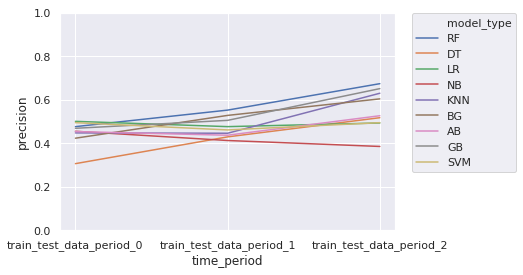

In [100]:
sns.lineplot(x="time_period", y="precision", hue="model_type", data=data, legend="brief")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 1)

In [101]:
models[(models['time_period'] == 'train_test_data_period_0') & (models['threshold'] == 10.0)].sort_values(by=['precision'], ascending=False)

,time_period,model_type,clf,parameters,threshold,auc-roc,precision,recall,f1_score
409,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 10...",10.0,0.808259,0.568389,0.282691,0.377587
339,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 2,...",10.0,0.808614,0.562310,0.279667,0.373549
416,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 1...",10.0,0.808321,0.560790,0.278912,0.372539
367,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 5, ...",10.0,0.807201,0.560790,0.278912,0.372539
374,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",10.0,0.808574,0.559271,0.278156,0.371530
346,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",10.0,0.808647,0.559271,0.278156,0.371530
381,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 5...",10.0,0.808594,0.557751,0.277400,0.370520
276,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 5...",10.0,0.808403,0.556231,0.276644,0.369510
262,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 5, ...",10.0,0.807788,0.556231,0.276644,0.369510
311,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 1...",10.0,0.808170,0.556231,0.276644,0.369510


In [102]:
models_to_run = ['RF', 'DT', 'LR', 'NB', 'KNN', 'BG', 'AB', 'GB', 'SVM']
time = ['train_test_data_period_0', 'train_test_data_period_1', 'train_test_data_period_2']
df = pd.DataFrame()
for t in time:
    for model in models_to_run:
        result = models[(models['time_period'] == t) & (models['model_type'] == model) & (models['threshold'] == 10)].sort_values(by='precision', ascending=False).iloc[[0]]
        df = pd.concat([df, result])

In [103]:
df

,time_period,model_type,clf,parameters,threshold,auc-roc,precision,recall,f1_score
409,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 10...",10.0,0.808259,0.568389,0.282691,0.377587
1417,train_test_data_period_0,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 5, 'criterion': 'entropy...",10.0,0.725877,0.468085,0.232804,0.310954
1571,train_test_data_period_0,LR,"LogisticRegression(C=10, class_weight=None, du...","{'penalty': 'l1', 'C': 10}",10.0,0.762360,0.501520,0.249433,0.333165
1585,train_test_data_period_0,NB,GaussianNB(priors=None),{},10.0,0.742731,0.455927,0.226757,0.302877
1809,train_test_data_period_0,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'weights': 'distance', 'algorithm': 'kd_tree'...",10.0,0.752422,0.449848,0.223734,0.298839
1851,train_test_data_period_0,BG,"BaggingClassifier(base_estimator=None, bootstr...",{'n_estimators': 50},10.0,0.750174,0.424012,0.210884,0.281676
1872,train_test_data_period_0,AB,"AdaBoostClassifier(algorithm='SAMME',\n ...","{'n_estimators': 100, 'algorithm': 'SAMME'}",10.0,0.790449,0.500000,0.248677,0.332155
2005,train_test_data_period_0,GB,GradientBoostingClassifier(criterion='friedman...,"{'n_estimators': 100, 'learning_rate': 0.01, '...",10.0,0.807299,0.551672,0.274376,0.366482
2495,train_test_data_period_0,SVM,"LinearSVC(C=1, class_weight=None, dual=False, ...","{'penalty': 'l1', 'C': 1}",10.0,0.772085,0.495441,0.246410,0.329127
3741,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10, 'min_samples_split': 10, ...",10.0,0.797288,0.579027,0.291284,0.387589


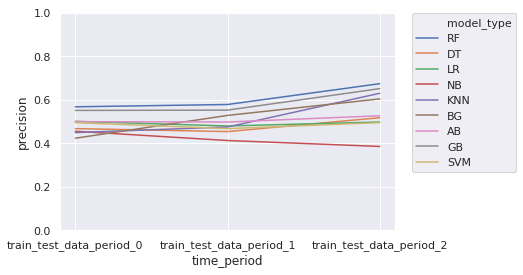

In [104]:
sns.lineplot(x="time_period", y="precision", hue="model_type", data=df, legend="brief")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)